In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np
from sklearn import tree


In [14]:
data = pd.read_csv('data/bike-sharing-hourly.csv')
# data['dteday'] = pd.to_datetime(data['dteday'], dayfirst=True)
# data['dteday'] = data['dteday'].dt.strftime('%d').astype(int)

# # these give you 100% accuracy, because they make up the cnt
# data = data.drop(['casual', 'instant', 'registered'], axis=1)


# data.to_csv('data/bike-sharing-hourly.csv', index=False)


data.dtypes
data.head(50)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,1,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,1,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,1,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,1,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,1,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14



Splitting data into training / test allows me to test the accuracy of my model on unseend data.

this split is random however to mainatin class raitios i have used stratisfied sampling.

random state = 1 allows randomisation to remain deterministic, this ensures that test data dos not bleed into the training data

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer



X = data.drop(['cnt'], axis=1)
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=1)
print(X_train.shape, y_train.shape)


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

print()


df = pd.DataFrame(data=X_train_minmax, columns=X_train.columns)
df.boxplot()




(13903, 13) (13903,)



<AxesSubplot: >

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# print(data.head())

print(data.info(verbose=1))

regr = MLPRegressor(random_state=1, max_iter=700,
                    activation="relu",
                    learning_rate="adaptive",
                    hidden_layer_sizes=(100, 100, 100, 100),
                    verbose=True)

 
# categorical_transformer = Pipeline(steps=[
#     ('onehot', MinMaxScaler()])

# transformations = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, cat)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(steps=[
                    #   ('normalise', MinMaxScaler()),
                      ('reggressor', regr)])


trainedModel = clf.fit(X_train, y_train)








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB
None
Iteration 1, loss = 20530.09847121
Iteration 2, loss = 13160.34954367
Iteration 3, loss = 11878.08926161
Iteration 4, loss = 9926.72426493
Iteration 5, loss = 8310.69030889
Iterat

/Users/alexvarden/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Multiclass classification requires One verses Rest in order to compare ROC_AUC 

Mean squared error: 2006.62
Coefficient of determination: 0.94
Mean Absolute Error: 27.42


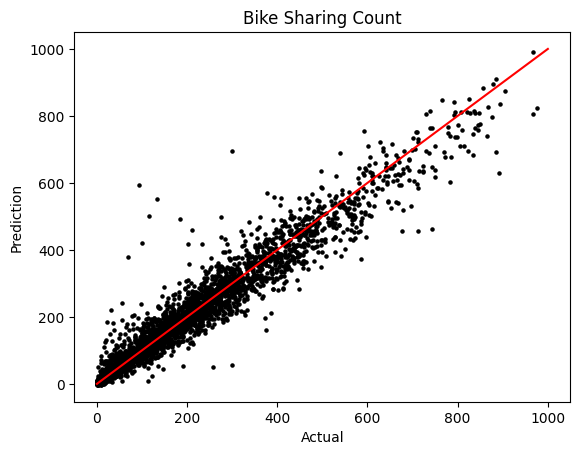

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_reg_pred_test = regr.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_reg_pred_test))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_reg_pred_test))
print('Mean Absolute Error: %.2f'
      % mean_absolute_error(y_test, y_reg_pred_test))
 
plt.scatter(y_test, y_reg_pred_test, s=5, color='black')
plt.plot([0, 1000], [0, 1000], color='red')
plt.ylabel("Prediction")
plt.xlabel("Actual")
plt.title(f"Bike Sharing Count")


plt.show()


In [ ]:
import pickle

filename = "models/bike-share-NN.pickle"
pickle.dump(regr, open(filename, "wb"))

